#### Objective

In this notebook I am testing a reduced workflow that will:

1) input a geophysical map as an image 

2) reduce the number of colours 

3) convert the image with reduced colours from RGB to HSL

4) extract unique values of H, then sort those and also the L values in the correponding pixels, by the same index

5) visualize the result as an H vs. L curve to QC of the method

6) run the perceptual test by checking for monotonicity

#### Preliminaries - import main libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, color, io
from skimage.future import graph

In [2]:
import requests
from PIL import Image

#### Import test image. The colormap is Matlab's Jet

In [3]:
img = np.asarray(io.imread('stuff4experiments/jet_tight.png'))[:,:,:3]

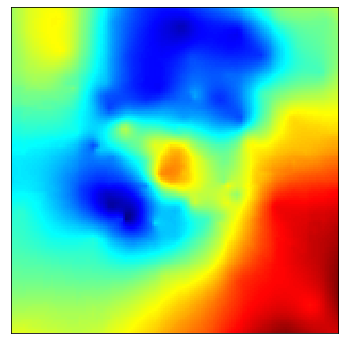

In [4]:
# plot image
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
plt.imshow(img)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([]);

#### Reduce number of colours

I use here Scikit-learn segmentation using k-means clustering in Color-(x,y,z) space:
http://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic

In [5]:
# parameters chosen by trial and error. Will have to find a way to automatically optimize them
labels1 = segmentation.slic(img, compactness=30, n_segments=32) 
out1 = color.label2rgb(labels1, img, kind='avg')

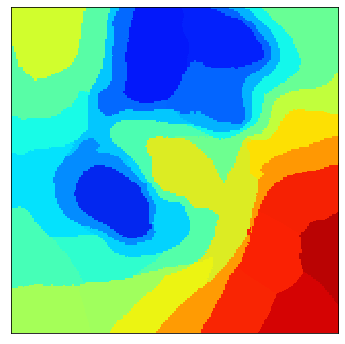

In [6]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
plt.imshow(out1)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([]);

#### Convert from RGB to HSL, get  unique values of H, S, and L then sort both lightness L and hue H, by increasing values of H

Sort H, with index returned then sort L with index

In [7]:
width, height, dump = np.shape(out1)

In [8]:
# sorting both lightness and hue by hue -  separately

from skimage.color import rgb2lab, lab2lch, lch2lab, lab2rgb
lab = rgb2lab(out1)
lch = lab2lch(lab)
        
lab = np.asarray(lab)
lch = np.asarray(lch)

pixels_lab = np.reshape(lab, (width*height, -1))
l1, a, b = np.split(pixels_lab, 3, axis=-1)
        
pixels_lch = np.reshape(lch, (width*height, -1))
l2, c, h = np.split(pixels_lch, 3, axis=-1)
                
huniq, unidx = np.unique(h, return_index=True)
luniq = l2[unidx]
cuniq = c[unidx]

# flatten luniq, cuniq
import itertools 
luniqM = list(itertools.chain.from_iterable(luniq))
cuniqM = list(itertools.chain.from_iterable(cuniq))

In [9]:
# compare output of two methods
lhM2 = np.asarray(zip(huniq,luniqM))

#### Make final plot of the sorted hue, H versus lightness, L, colored by L

In [10]:
# To color by L, it has to be normalized to [0 1]
luniqM_n=(luniqM-min(luniqM))/(max(luniqM)-min(luniqM))

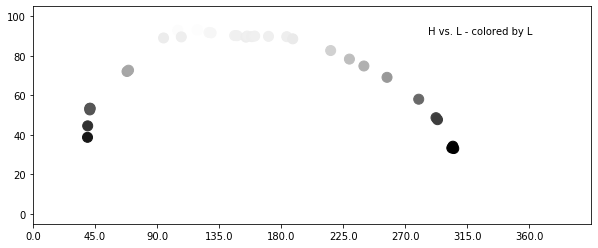

In [11]:
fig= plt.figure(figsize=(10,4))

# Hue as 0-360 angle

plt.xlim(0, 2.25*np.pi)
plt.ylim(-5, 105)
plt.text(5, 95, 'H vs. L - colored by L', va='top');
plt.xticks(np.arange(0, 2.25*np.pi,0.25*np.pi),[0.,   45.,   90.,  135.,  180.,  225.,  270.,  315., 360.]) 
plt.scatter(huniq,luniqM, s= 100, c=luniqM_n, cmap='gray');

#### Run perceptual test checks for monotonicity 

In [12]:
# Stackoverflow answer http://stackoverflow.com/a/4985520

def pairwise(seq):
    items = iter(seq)
    last = next(items)
    for item in items:
        yield last, item
        last = item

def strictly_increasing(L):
    return all(x<y for x, y in pairwise(L))

def strictly_decreasing(L):
    return all(x>y for x, y in pairwise(L))

def non_increasing(L):
    return all(x>=y for x, y in pairwise(L))

def non_decreasing(L):
    return all(x<=y for x, y in pairwise(L))

In [13]:
print (strictly_increasing(luniq))
print (non_decreasing(luniq))

print (strictly_decreasing(luniq))
print (non_increasing(luniq))

False
False
False
False


#### Now we try it on an abstract rainbow image

In [14]:
img = np.asarray(io.imread('stuff4experiments/rainbow_texture17611.png'))[:,:,:3]

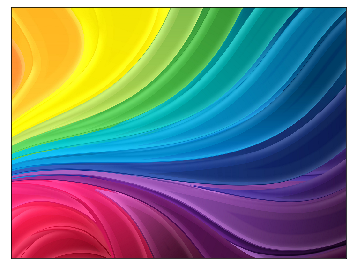

In [15]:
# plot image
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
plt.imshow(img)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([]);

In [16]:
labels1 = segmentation.slic(img, compactness=30, n_segments=32)
out1 = color.label2rgb(labels1, img, kind='avg')

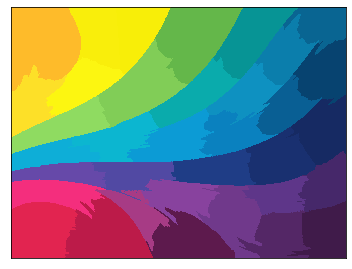

In [17]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
plt.imshow(out1)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([]);

In [18]:
width, height, dump = np.shape(out1)

# sorting both lightness and hue by hue separately

from skimage.color import rgb2lab, lab2lch, lch2lab, lab2rgb
lab = rgb2lab(out1)
lch = lab2lch(lab)
        
lab = np.asarray(lab)
lch = np.asarray(lch)


pixels_lab = np.reshape(lab, (width*height, -1))
l1, a, b = np.split(pixels_lab, 3, axis=-1)
        
pixels_lch = np.reshape(lch, (width*height, -1))
l2, c, h = np.split(pixels_lch, 3, axis=-1)
                
huniq, unidx = np.unique(h, return_index=True)
luniq = l2[unidx]
cuniq = c[unidx]

# flatten luniq, cuniq
import itertools 
luniqM = list(itertools.chain.from_iterable(luniq))
cuniqM = list(itertools.chain.from_iterable(cuniq))

In [19]:
# To color by L, it has to be normalized to [0 1]
luniqM_n=(luniqM-min(luniqM))/(max(luniqM)-min(luniqM))

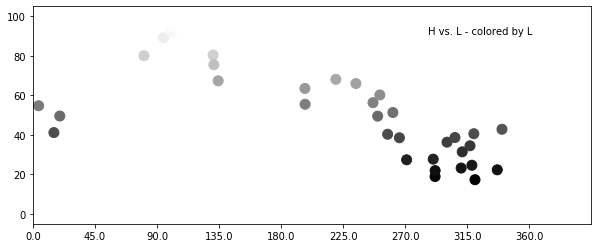

In [20]:
fig= plt.figure(figsize=(10,4))

# Hue as 0-360 angle

plt.xlim(0, 2.25*np.pi)
plt.ylim(-5, 105)
plt.text(5, 95, 'H vs. L - colored by L', va='top');
plt.xticks(np.arange(0, 2.25*np.pi,0.25*np.pi),[0.,   45.,   90.,  135.,  180.,  225.,  270.,  315., 360.]) 
plt.scatter(huniq,luniqM, s= 100, c=luniqM_n, cmap='gray');

In [21]:
print (strictly_increasing(luniq))
print (non_decreasing(luniq))

print (strictly_decreasing(luniq))
print (non_increasing(luniq))

False
False
False
False


#### Try it on mycarta perceptual rainbow

In [22]:
img = np.asarray(io.imread('stuff4experiments/cubic_no_red_tight.png'))[:,:,:3]

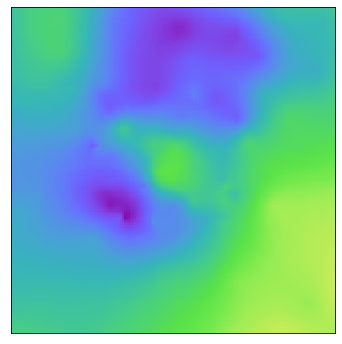

In [23]:
# plot image
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
plt.imshow(img)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([]);

In [24]:
labels1 = segmentation.slic(img, compactness=30, n_segments=32)
out1 = color.label2rgb(labels1, img, kind='avg')

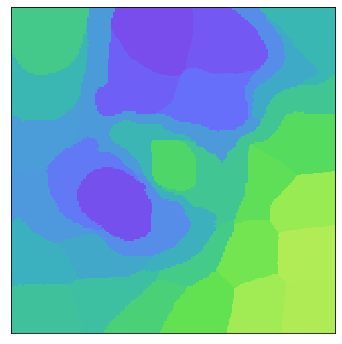

In [25]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
plt.imshow(out1)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([]);

In [26]:
width, height, dump = np.shape(out1)

# sorting both lightness and hue by hue separately

from skimage.color import rgb2lab, lab2lch, lch2lab, lab2rgb
lab = rgb2lab(out1)
lch = lab2lch(lab)
        
lab = np.asarray(lab)
lch = np.asarray(lch)


pixels_lab = np.reshape(lab, (width*height, -1))
l1, a, b = np.split(pixels_lab, 3, axis=-1)
        
pixels_lch = np.reshape(lch, (width*height, -1))
l2, c, h = np.split(pixels_lch, 3, axis=-1)
                
huniq, unidx = np.unique(h, return_index=True)
luniq = l2[unidx]
cuniq = c[unidx]

# flatten luniq, cuniq
import itertools 
luniqM = list(itertools.chain.from_iterable(luniq))
cuniqM = list(itertools.chain.from_iterable(cuniq))

In [27]:
# To color by L, it has to be normalized to [0 1]
luniqM_n=(luniqM-min(luniqM))/(max(luniqM)-min(luniqM))

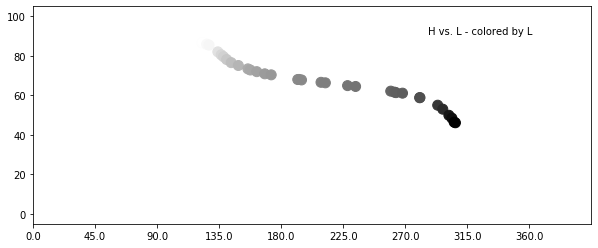

In [28]:
fig= plt.figure(figsize=(10,4))

# Hue as 0-360 angle

plt.xlim(0, 2.25*np.pi)
plt.ylim(-5, 105)
plt.text(5, 95, 'H vs. L - colored by L', va='top');
plt.xticks(np.arange(0, 2.25*np.pi,0.25*np.pi),[0.,   45.,   90.,  135.,  180.,  225.,  270.,  315., 360.]) 
plt.scatter(huniq,luniqM, s= 100, c=luniqM_n, cmap='gray');

In [29]:
print (strictly_increasing(luniq))
print (non_decreasing(luniq))

print (strictly_decreasing(luniq))
print (non_increasing(luniq))

False
False
False
False


The test should have worked but it did not.
We need to include some smoothing, or despiking to deal with small non monotonic value pairs. See below tests

[86.53900200859584, 86.8869577084834, 85.82248246411167, 85.40900342161996, 81.97956867953603, 80.49697704856175, 79.5230723936291, 78.10006385525797, 76.52872942565793, 75.08291679847268, 73.38427312357126, 72.8019801738289, 71.97093436799055, 70.87372663589632, 70.35888577798525]


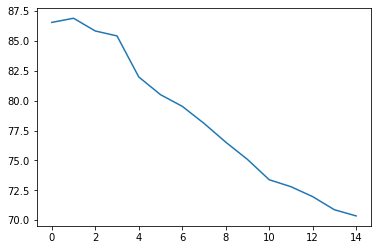

In [30]:
print (luniqM[:15])
plt.plot(luniqM[:15]);

#### From Matt Hall
https://github.com/kwinkunks/notebooks/blob/master/Backus.ipynb

In [31]:
def moving_average(a, length, mode='valid'):
    
    #pad = np.floor(length/2)
    pad = int(np.floor(length/2))   # replace to prevent a deprecation warning 
                                    # due to passing a float as an index
    
    if mode == 'full': 
        pad *= 2
    
    # Make a padded version, paddding with first and last values
    r = np.empty(a.shape[0] + 2*pad)
    r[:pad] = a[0]
    r[pad:-pad] = a
    r[-pad:] = a[-1]
    
    # Cumsum with shifting trick
    s = np.cumsum(r, dtype=float)
    s[length:] = s[length:] - s[:-length]
    out = s[length-1:]/length
    
    # Decide what to return
    if mode == 'same':
        if out.shape[0] != a.shape[0]: 
            # If size doesn't match, then interpolate.
            out = (out[:-1,...] + out[1:,...]) / 2
        return out
    elif mode == 'valid':
        return out[pad:-pad]
    else: # mode=='full' and we used a double pad
        return out

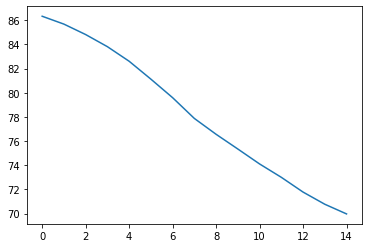

In [32]:
avg = moving_average(np.asarray(luniqM), 7, mode='same')
plt.plot(avg[:15]);

In [33]:
print (strictly_increasing(avg))
print (non_decreasing(avg))

print (strictly_decreasing(avg))
print (non_increasing(avg))

False
False
True
True


### SUCCESS !